## Convolution and deconvolution on an array

(250, 250)

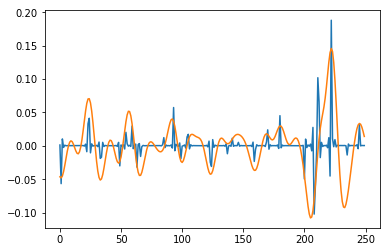

In [127]:
from scipy import signal
# original = [0.3, 1.2, -0.10, 0, 1, 1, 0, 0] #RC
original =r[300:550]
# impulse_response = [2, 0,1,-1,0,-2,1,3,-1] #wavelet
impulse_response=myw
recorded = signal.convolve(impulse_response, original)
# recorded
proc_recorded=recorded[int(len(myw)/2):1-int(len(myw)/2)]
recovered, remainder = signal.deconvolve(proc_recorded, impulse_response)
# print(recovered)
plt.figure()
plt.plot(original)
plt.plot(proc_recorded)
# plt.plot(recovered+0.1)
len(original),len(proc_recorded)
# recovered, remainder = signal.deconvolve(proc_recorded, original)

# plt.figure()
# # plt.plot(impulse_response)
# plt.plot(recovered+0.1)


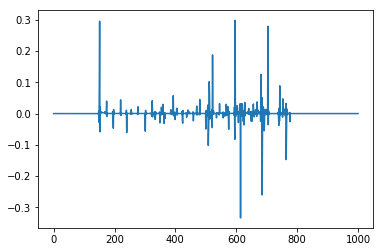

In [28]:
plt.plot(r)

## Wavelet and reflectivity

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from bruges.filters import ricker, rotate_phase
from scipy import linalg as la
from numpy.linalg import lstsq

from sklearn import linear_model
%matplotlib inline

In [4]:
r = np.load("rpp.npy")
s = np.load("seismic.npy")
dt = .002  # sample rate in seconds
t = np.arange(s.size) * dt

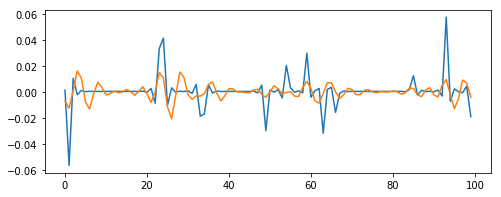

In [34]:
fig01 = plt.figure(figsize=(8,3))
plt.plot(r[300:400])
plt.plot(s[300:400])

[]

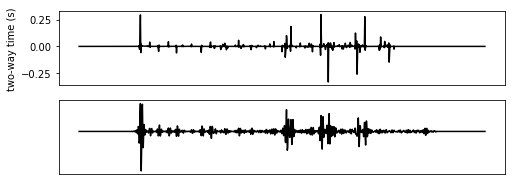

In [8]:
fig01 = plt.figure(figsize=(8,3))

# Reflectivity track
ax = fig01.add_subplot(211)
ax.plot(t, r, 'k')
ax.set_xticks([])
# ax.set_xlim(-0.5,0.5)
# ax.set_ylim(1.5,0)
ax.set_ylabel('two-way time (s)')

# Seismic track
ax2 = fig01.add_subplot(212)
ax2.plot(t, s, 'k')
# ax2.fill_betweeny( s, t,0, s > 0, color='k', alpha=1.0)
# ax2.set_ylim(1.5,0)
# ax2.set_xlim(-0.25,0.25)
ax2.set_xticks([])
ax2.set_yticks([])

128

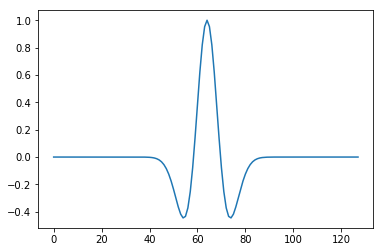

In [96]:
from bruges.filters import ricker as ricker_

FS = 1/0.002

def ricky(length, width):
    return ricker_(0.256, 1/FS, width)
myw=ricky(400,20)
plt.plot(myw)
imp=r
len(myw)

In [89]:
sig = signal.convolve( imp+0.00001,myw)
sig

array([-1.04147110e-31, -8.53763811e-31, -6.07881917e-30, ...,
       -4.12437966e-29, -5.97467206e-30, -7.49616701e-31])

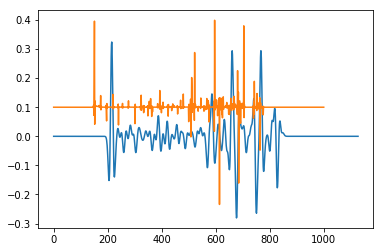

In [90]:
# plt.plot(wvlt)
plt.plot(sig)
plt.plot(imp+0.1)

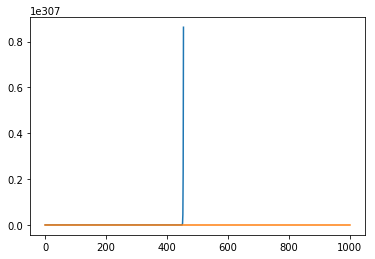

In [91]:
# recalc_w,remain = signal.deconvolve(sig, imp+0.00001)
# plt.plot(recalc_w)
# plt.plot(myw+0.1)
# plt.figure()
recalc_imp,remain2 = signal.deconvolve(sig, myw)
plt.plot(recalc_imp)
plt.plot(imp)